In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
import sys
warnings.simplefilter(action='ignore', category = FutureWarning)


In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)


2023-09-04 19:54:02.980838: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-04 19:54:08.147570: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-04 19:54:08.147912: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

1 Physical GPUs, 1 Logical GPUs


2023-09-04 19:54:08.291708: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-04 19:54:08.293110: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-04 19:54:08.293235: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [4]:
classes = os.listdir("/home/e17358/4yp/MedNET/MedNET/train")
print(classes)


['Skin_Cancer', 'BreastHistopathology', 'chest_xray', 'BreaKHis 400X', 'Kidney_Tumor', 'lung_scc']


In [5]:
base = '/home/e17358/4yp/MedNET/MedNET'

In [6]:
# split_ratio = [0.8, 0.1, 0.1]  # Training, Validation, Test
# allowed_extensions = ['.jpg', '.png', '.jpeg', '.tif']  # Add more extensions if needed
# base = '/home/e17358/4yp/MedNET/MedNET'

# for class_name in classes:
#     class_dir = os.path.join(base, class_name)
#     print(class_dir,os.path.isdir(class_dir))
    
#     if os.path.isdir("MedNET/train") is False:
#         os.makedirs(os.path.join(base, 'train'))
#         os.makedirs(os.path.join(base, 'valid'))
#         os.makedirs(os.path.join(base, 'test'))
    
#     files = []
#     for ext in allowed_extensions:
#         files.extend(glob.glob(os.path.join(class_dir, '*' + ext)))
    
#     num_files = len(files)
#     print("Number of files", num_files)
#     num_train = int(num_files * split_ratio[0])
#     num_valid = int(num_files * split_ratio[1])
#     num_test = num_files - num_train - num_valid
#     random.shuffle(files)
    
#     for f in files[:num_train]:
#         shutil.move(f, os.path.join(base, 'train', os.path.basename(f)))
    
#     for f in files[num_train:num_train + num_valid]:
#         shutil.move(f, os.path.join(base, 'valid', os.path.basename(f)))
    
#     for f in files[num_train + num_valid:]:
#             shutil.move(f, os.path.join(base, 'test', os.path.basename(f)))

# print("Data split and organized successfully.")


In [7]:
train_path = os.path.join(base, 'train')
valid_path = os.path.join(base, 'test')
test_path =  os.path.join(base, 'valid')
print(len(os.listdir(train_path)))

6


In [8]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224, 224), classes=classes, batch_size=32)
valid_batches = ImageDataGenerator(preprocessing_function= tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory= valid_path, target_size = (224,224),classes = classes, batch_size = 16)
test_batches =  ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory = test_path, target_size=(224,224),classes =classes, batch_size = 16, shuffle = False)

Found 28211 images belonging to 6 classes.
Found 3531 images belonging to 6 classes.
Found 3524 images belonging to 6 classes.


In [9]:
def plotImages(images_arr):
  fig,axes = plt.subplots(1,10, figsize = (20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

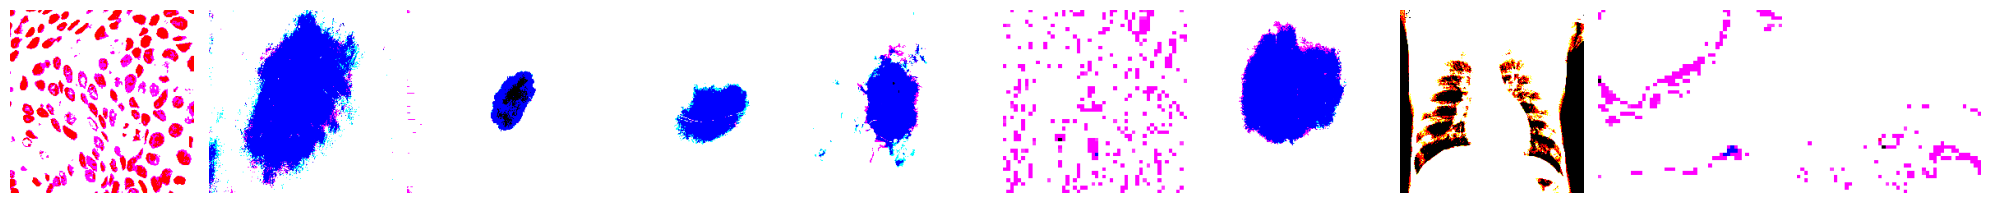

In [10]:
imgs, labels = next(train_batches)
plotImages(imgs)

In [11]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [12]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
  model.add(layer)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [15]:
model.add(Dense(units=6, activation = 'softmax'))

In [16]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss= 'categorical_crossentropy', metrics=['accuracy'])

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define a ModelCheckpoint callback to save checkpoints
checkpoint_filepath = 'model_checkpoint.h5'  # Define the path where checkpoints will be saved
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,  # Save only the best model
    monitor='val_loss',   # Monitor validation loss
    mode='min',           # Minimize validation loss
    save_freq='epoch',    # Save checkpoint at the end of each epoch
    save_freq=5              # Save checkpoint every 5 epochs
)

# Train your model and save the training history
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=20, verbose=2, callbacks=[model_checkpoint_callback])

# Extracting training and validation loss and accuracy from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']


Epoch 1/20


2023-09-04 19:56:47.492013: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8902
2023-09-04 19:57:11.994665: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 900.25MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-09-04 19:57:12.408656: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 662.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-09-04 19:57:12.418384: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.15GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains 

In [ ]:
from tensorflow.keras.models import load_model

checkpoint_filepath = 'model_checkpoint.h5'
model = load_model(checkpoint_filepath)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=20, verbose=2, callbacks=[model_checkpoint_callback])


In [ ]:
# Save training history to a log file
with open('training_log.txt', 'w') as log_file:
    log_file.write("Training Loss:\n")
    log_file.write(str(history.history['loss']) + '\n')
    log_file.write("Validation Loss:\n")
    log_file.write(str(history.history['val_loss']) + '\n')
    log_file.write("Training Accuracy:\n")
    log_file.write(str(history.history['accuracy']) + '\n')
    log_file.write("Validation Accuracy:\n")
    log_file.write(str(history.history['val_accuracy']) + '\n')

NameError: name 'history' is not defined

In [ ]:
# Creating a graph to visualize the training and validation loss over epochs
plt.figure(figsize=(12, 6))

# Plotting loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, label='Training Accuracy')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
prediction = model.predict(x = test_batches, verbose=2)

In [ ]:
def plot_confusion_matrix(cm, classes, normalize= False, title='Confusin Matrix', cmap = plt.cm.Blues):
  plt.imshow(cm, interpolation = 'nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks,classes)

  if normalize:
    cm = cm.astype('flot')/ cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)
  thresh = cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i,cm[i,j],
             horizontalalignment = "center",
             color="white" if cm[i,j]> thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
test_batches.classes

array([0, 0, 0, ..., 5, 5, 5], dtype=int32)

In [ ]:
cm = confusion_matrix(y_true= test_batches.classes, y_pred= np.argmax(prediction,axis=-1))

In [ ]:
cm_plot_labels = classes
plot_confusion_matrix(cm=cm, classes= cm_plot_labels, title= 'Confusion Matrix')

In [ ]:
# Assuming you have a model named 'model' that you want to save
model.save('MedNET_FeatureExtractor_Vgg16')  # Save the model to a directory or file
